# jsonl → dataframe

jsonl은 json line의 약어로, JSON Lines 텍스트 형식<br/>
일반적인 json과 동일하나, encoding을 utf8로, 그리고 각각의 행이 입력될 때 \n(행 띄우기)가 추가된 형식

In [ ]:
# !pip install jsonlines
# !pip install koreanize-matplotlib

In [1]:
import pandas as pd
import numpy as np
import jsonlines

import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
sentence_form = []
annotation_1_entity = []
annotation_1_polarity = []
annotation_2_entity = []
annotation_2_polarity = []
annotation_3_entity = []
annotation_3_polarity = []
annotation_4_entity = []
annotation_4_polarity = []
annotation_5_entity = []
annotation_5_polarity = []

In [3]:
max_annotation = 0
with jsonlines.open("../data/nikluge-sa-2022-train.jsonl") as f:
    for line in f.iter():
        sentence_form.append(line["sentence_form"])
        for i in range(5):
            if i+1 == 1:
                if len(line["annotation"]) >= i+1:
                    annotation_1_entity.append(line["annotation"][i][0])
                    annotation_1_polarity.append(line["annotation"][i][2])
                else:
                    annotation_1_entity.append(np.nan)
                    annotation_1_polarity.append(np.nan)
            if i+1 == 2:
                if len(line["annotation"]) >= i+1:
                    annotation_2_entity.append(line["annotation"][i][0])
                    annotation_2_polarity.append(line["annotation"][i][2])
                else:
                    annotation_2_entity.append(np.nan)
                    annotation_2_polarity.append(np.nan)
            if i+1 == 3:
                if len(line["annotation"]) >= i+1:
                    annotation_3_entity.append(line["annotation"][i][0])
                    annotation_3_polarity.append(line["annotation"][i][2])
                else:
                    annotation_3_entity.append(np.nan)
                    annotation_3_polarity.append(np.nan)
            if i+1 == 4:
                if len(line["annotation"]) >= i+1:
                    annotation_4_entity.append(line["annotation"][i][0])
                    annotation_4_polarity.append(line["annotation"][i][2])
                else:
                    annotation_4_entity.append(np.nan)
                    annotation_4_polarity.append(np.nan)
            if i+1 == 5:
                if len(line["annotation"]) >= i+1:
                    annotation_5_entity.append(line["annotation"][i][0])
                    annotation_5_polarity.append(line["annotation"][i][2])
                else:
                    annotation_5_entity.append(np.nan)
                    annotation_5_polarity.append(np.nan)

In [4]:
train_df = pd.DataFrame({"sentence_form": sentence_form,
                        "annotation_1_entity":annotation_1_entity,
                        "annotation_1_polarity":annotation_1_polarity,
                        "annotation_2_entity":annotation_2_entity,
                        "annotation_2_polarity":annotation_2_polarity,
                        "annotation_3_entity":annotation_3_entity,
                        "annotation_3_polarity":annotation_3_polarity,
                         "annotation_4_entity":annotation_4_entity,
                        "annotation_4_polarity":annotation_4_polarity,
                         "annotation_5_entity":annotation_5_entity,
                        "annotation_5_polarity":annotation_5_polarity,
                        })

In [5]:
train_df.head()

,sentence_form,annotation_1_entity,annotation_1_polarity,annotation_2_entity,annotation_2_polarity,annotation_3_entity,annotation_3_polarity,annotation_4_entity,annotation_4_polarity,annotation_5_entity,annotation_5_polarity
0,둘쨋날은 미친듯이 밟아봤더니 기어가 헛돌면서 틱틱 소리가 나서 경악.,본품#품질,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"이거 뭐 삐꾸를 준 거 아냐 불안하고, 거금 투자한 게 왜 이래.. 싶어서 정이 확...",본품#품질,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,간사하게도 그 이후에는 라이딩이 아주 즐거워져서 만족스럽게 탔다.,제품 전체#일반,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,샥이 없는 모델이라 일반 도로에서 타면 노면의 진동 때문에 손목이 덜덜덜 떨리고 이...,제품 전체#일반,neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,안장도 딱딱해서 엉덩이가 아팠는데 무시하고 타고 있다.,본품#일반,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   sentence_form          3001 non-null   object
 1   annotation_1_entity    3001 non-null   object
 2   annotation_1_polarity  3001 non-null   object
 3   annotation_2_entity    235 non-null    object
 4   annotation_2_polarity  235 non-null    object
 5   annotation_3_entity    14 non-null     object
 6   annotation_3_polarity  14 non-null     object
 7   annotation_4_entity    4 non-null      object
 8   annotation_4_polarity  4 non-null      object
 9   annotation_5_entity    1 non-null      object
 10  annotation_5_polarity  1 non-null      object
dtypes: object(11)
memory usage: 258.0+ KB


train set : 총 3001개의 문장 <br/>
annotation은 최대 **5개**까지 존재함 <br/>
annotation은 최소한 모두 1개씩은 갖고있고, 2개 갖고있는 경우가 235개, 3개는 14개, 4개는 4개, 5개는 1개

# 문장 글자 수 분포

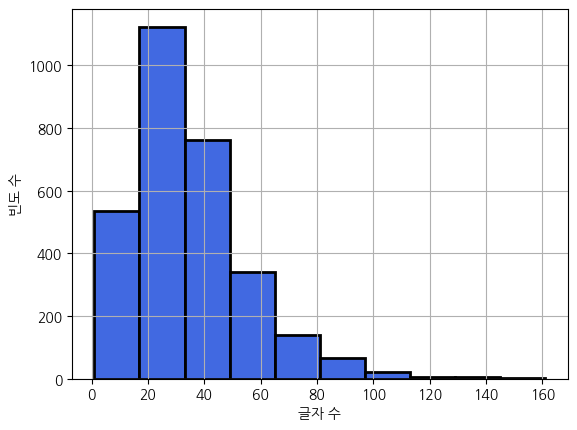

In [7]:
ax = train_df["sentence_form"].str.len().hist(edgecolor='black', linewidth=2, color='royalblue')

ax.set_xlabel('글자 수')
ax.set_ylabel('빈도 수')
plt.show()

# entity 분포

In [8]:
annotation_entity = []
annotation_polarity = []

with jsonlines.open("../data/nikluge-sa-2022-train.jsonl") as f:
    for line in f.iter():
        for i in range(len(line["annotation"])):
            annotation_entity.append(line["annotation"][i][0])
            annotation_polarity.append(line["annotation"][i][2])

In [9]:
train_annotation_df = pd.DataFrame({
                        "annotation_entity":annotation_entity,
                        "annotation_polarity":annotation_polarity,
                        })

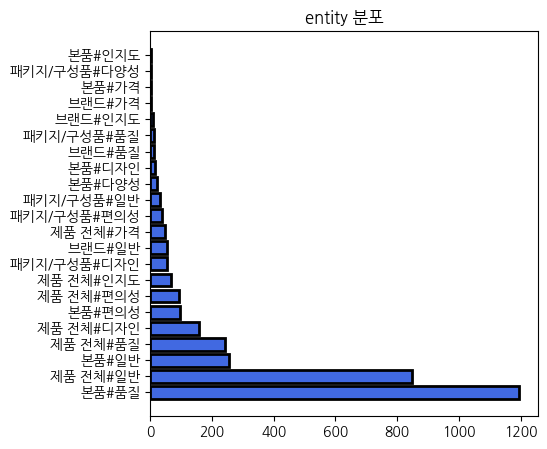

In [10]:
annotation_entity_index = train_annotation_df['annotation_entity'].value_counts()

fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.barh(annotation_entity_index.index, annotation_entity_index, edgecolor='black', linewidth=2, color='royalblue')
ax.set_title("entity 분포")

plt.show()

# entity 별 polarity 분포

In [11]:
group = train_annotation_df.groupby('annotation_polarity')['annotation_entity'].value_counts().sort_index()

In [12]:
group

annotation_polarity  annotation_entity
negative             본품#디자인                  1
                     본품#일반                   6
                     본품#편의성                  6
                     본품#품질                  13
                     브랜드#인지도                 1
                     브랜드#일반                  1
                     브랜드#품질                  2
                     제품 전체#가격                5
                     제품 전체#디자인              16
                     제품 전체#일반                5
                     제품 전체#편의성               2
neutral              본품#디자인                  1
                     본품#일반                   6
                     본품#품질                  25
                     브랜드#일반                  3
                     브랜드#품질                  1
                     제품 전체#가격                3
                     제품 전체#디자인               5
                     제품 전체#일반               42
                     제품 전체#편의성               2
                     

In [13]:
default=[
        "제품 전체#일반",
        "제품 전체#가격",
        "제품 전체#디자인",
        "제품 전체#품질",
        "제품 전체#편의성",
        "제품 전체#인지도",
        '제품 전체#다양성',
        "본품#일반",
        "본품#디자인",
        "본품#품질",
        "본품#편의성",
        "본품#다양성",
        '본품#인지도',
        '본품#가격',
        "패키지/구성품#일반",
        "패키지/구성품#디자인",
        "패키지/구성품#품질",
        "패키지/구성품#편의성",
        "패키지/구성품#다양성",
        '패키지/구성품#가격',
        "브랜드#일반",
        "브랜드#가격",
        "브랜드#디자인",
        "브랜드#품질",
        "브랜드#인지도"
    ]

In [14]:
negative_dict = {k : 0 for k in default}

for k,v in group['negative'].items():
    negative_dict[k] = v

In [15]:
neutral_dict = {k : 0 for k in default}

for k,v in group['neutral'].items():
    neutral_dict[k] = v

In [16]:
positive_dict = {k : 0 for k in default}

for k,v in group['positive'].items():
    positive_dict[k] = v

In [17]:
group_neg = pd.Series(negative_dict.values(),index=default)

In [18]:
group_neu = pd.Series(neutral_dict.values(), index=default)

In [19]:
group_pos = pd.Series(positive_dict.values(), index=default)

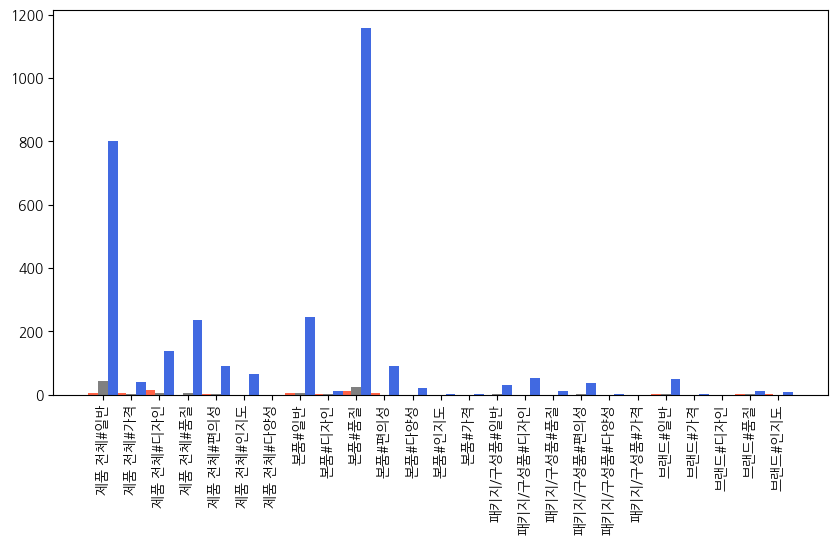

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

idx = np.arange(len(group_neg))
width = 0.35

ax.bar(idx-width, group_neg, color='tomato', width=width)
ax.bar(idx, group_neu, color='gray', width=width)
ax.bar(idx+width, group_pos, color='royalblue', width=width)

plt.xticks(idx, default)
plt.xticks(rotation=90)
plt.show()